In [1]:
import numpy as np
from matplotlib import pyplot as plt
from classy import Class

In [2]:
#This way of calculating the relative deviation works because the the x-axis arrays are equal.
def reldev(y1, y2):
    return 100*(y2 - y1)/y1

In [3]:
cosmo = Class()

# LCDM part

In [4]:
paramsLCDM = {
    'output': 'tCl,pCl,lCl,mPk'
}

In [6]:
cosmo.set(paramsLCDM)

True

In [7]:
cosmo.compute()

In [8]:
lcdmCl = cosmo.raw_cl()

In [9]:
lcdmPk = []
kList = np.linspace(10**(-5), 10**(-1), 3000)
for k in kList:
    lcdmPk.append(cosmo.pk(k, 0))
lcdmPk = np.array(lcdmPk)

In [10]:
cosmo.struct_cleanup()

# Alphas' part

In [11]:
# We copy the parameters of one of the parameters.ini
params = {
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'expansion_model': 'lcdm',
    'gravity_model': 'propto_omega',
                    #x_k, x_b, x_m, x_t, M*^2_ini
    #parameters_smg = 1., 0.625, 0., 0., 1.,
    'output': 'tCl,pCl,lCl,mPk'
}

In [12]:
x_k = 1
x_b = 0
x_m = 0
x_t = 0
M = 1

In [13]:
cl = {}
pk = {}

for x_b in [0, 0.625, 1.25, 1.875, 2.5]:
    params['parameters_smg'] = "{}, {}, {}, {}, {}".format(x_k, x_b, x_m, x_t, M)
    cosmo.set(params)
    cosmo.compute()
    cl[x_b] = cosmo.raw_cl()
    pk[x_b] = []
    for k in kList:
        pk[x_b].append(cosmo.pk(k, 0))
    pk[x_b] = np.array(pk[x_b])
    cosmo.struct_cleanup()

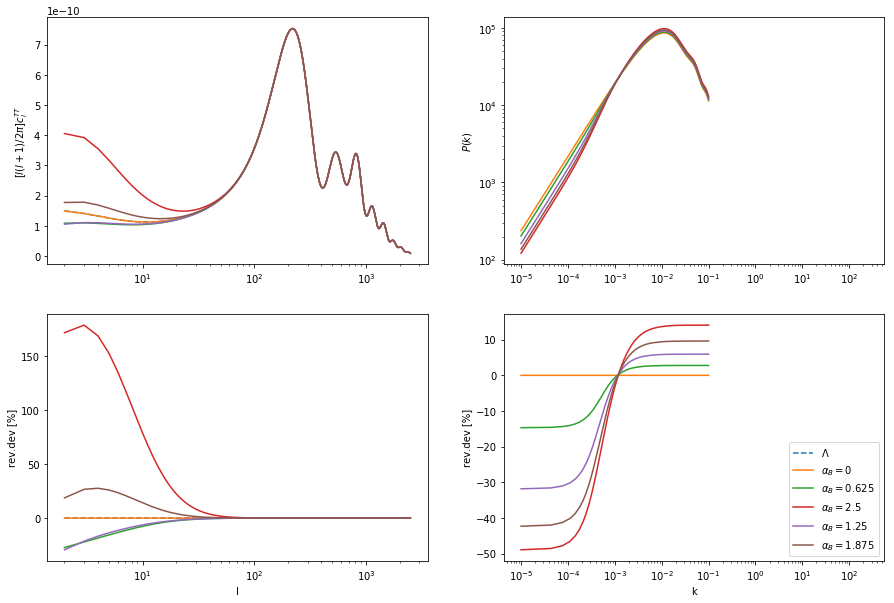

In [14]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

# First plot LCDM results
clList = [np.arange(len(lcdmCl['tt'][2:]))+2]
clList.append(lcdmCl['tt'][2:]*(clList[0]*(clList[0]+1)/(2*np.pi)))
pkList = lcdmPk
label = r'$\Lambda$'

ax[0, 0].semilogx(clList[0], clList[1], '--', label=label)
ax[0, 0].set_ylabel(r'$[l(l+1)/2\pi]c^{TT}_l$')

ax[0, 1].loglog(pkList[0], pkList[1], '--', label=label)
ax[0, 1].set_ylabel(r'$P(k)$')

ax[1, 0].semilogx(clList[0], reldev(clList[1], clList[1]), '--', label=label)
ax[1, 0].set_xlabel('l')
ax[1, 0].set_ylabel(r'rev.dev [%]')

ax[1, 1].semilogx(pkList[0], reldev(pkList[1], pkList[1]), '--', label=label)
ax[1, 1].set_xlabel('k')
ax[1, 1].set_ylabel(r'rev.dev [%]')

# Then plot the modified gravity results
lcdmClList = list(clList)  # Make a copy of the array, otherwise it would be referenced to the same memory address.
for alpha_b in cl:
    clList[1] = cl[alpha_b]['tt'][2:]*(clList[0]*(clList[0]+1)/(2*np.pi))
    pkList = pk[alpha_b]
    label = r'$\alpha_B={}$'.format(alpha_b)
    
    ax[0, 0].semilogx(clList[0], clList[1], label=label)    
    ax[0, 1].loglog(kList, pkList , label=label)
    ax[1, 0].semilogx(clList[0], reldev(lcdmClList[1], clList[1]), label=label)
    ax[1, 1].semilogx(kList, reldev(lcdmPk, pkList), label=label)

plt.legend(loc=0)
plt.show()
plt.close()